In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import netCDF4 as nc
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num

file = open('F://Jupyter/Data/1970-2018bst.txt',mode = 'r')
TyphoonData = pd.read_csv('F://Jupyter/Data/1970-2018bst.csv')
TyphoonTime = pd.read_csv('F://Jupyter/Data/1970-2018date.csv')
TData = nc.MFDataset("F://Jupyter/Data/Temperature/*nc")
UData = nc.MFDataset("F://Jupyter/Data/u_wind/*nc")
VData = nc.MFDataset("F://Jupyter/Data/v_wind/*nc")
WData = nc.MFDataset("F://Jupyter/Data/w_wind/*nc")
PData = nc.MFDataset("F://Jupyter/Data/pre/*nc")

Tem = TData.variables['air']
Time = TData.variables['time']
Lon = TData.variables['lon']
Lat = TData.variables['lat']
Lev = TData.variables['level']
Uwind = UData.variables['uwnd']
Vwind = VData.variables['vwnd']
Wwind = WData.variables['omega']
Pre = PData.variables['hgt']

def FindIndex(A,N):
    for i in range(len(A[:])):
        if A[i] == N:
            return i
            break
    return i

In [2]:
#data

In [3]:
TyphoonData.shape

(47925, 7)

In [4]:
Date =TyphoonData['date']
TyphoonLat = TyphoonData['lat']
TyphoonLon = TyphoonData['lon']
TyphoonID = TyphoonTime['ID']
days = TyphoonTime['day']
len(TyphoonID)
len(days)
Date

0             66666
1        1970021900
2        1970021906
3        1970021912
4        1970021918
            ...    
47920    2018112600
47921    2018112606
47922    2018112612
47923    2018112618
47924         66666
Name: date, Length: 47925, dtype: int64

In [5]:
def func(D,Lat,Lon):
    Date2 = []
    days = []
    lat = []
    lon = []
    k = 0
    
    for i in range(0,len(D)):
        if D[i] != 66666:
            timeStruct = time.strptime(str(D[i]),"%Y%m%d%H")
            strTime = time.strftime("%Y %m %d %H", timeStruct)
            t = strTime.split( ' ')
            T = datetime(int(t[0]),int(t[1]),int(t[2]),int(t[3]))
            unit = 'hours since 1800-01-01 00:00:0.0'
            a = date2num(T,units = unit)
            Date2.append(a)
            lat.append(Lat[i])
            lon.append(Lon[i])
            k+=1
        else:
            if(k!=0):
                days.append(k)
                k = 0
    return Date2,days,lat,lon


In [34]:
date,day ,lat ,lon= func(Date,TyphoonLat,TyphoonLon)

In [7]:
len(date)

46657

In [8]:
len(lat)

46657

In [9]:
len(day)

1267

In [10]:
sum(days)

46657

In [39]:
def func2(date,lat,lon,day,ID):
    Typhoon = []
    e = 0
    k = 0
    for j in day:
        t = []
        for i in range(e,e+j):
            t.append([date[i],lat[i]/10.0,lon[i]/10.0,ID[k]])
            e+=1
        k+=1
        Typhoon.append(t)
    return Typhoon

In [40]:
Typhoon  = func2(date,lat,lon,day,TyphoonID)
# f2 = open('F://Jupyter/Data/list.txt','w')
# for i in range(len(Typhoon)):
#         for j in range(len(Typhoon[i])):
        
#            f2.write(str(Typhoon[i][j][0])+" "+str(Typhoon[i][j][1])+" "+str(Typhoon[i][j][2])+" "+str(Typhoon[i][j][3]))
#            f2.write('\n')

# f2.close()
len(Typhoon)

1267

In [46]:
for i in range(0,len(day)):
    if len(Typhoon[i])!= day[i]:
        print("ERROR\n")

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
TData = nc.MFDataset("F://Jupyter/Data/Temperature/*nc")
UData = nc.MFDataset("F://Jupyter/Data/u_wind/*nc")
VData = nc.MFDataset("F://Jupyter/Data/v_wind/*nc")
WData = nc.MFDataset("F://Jupyter/Data/w_wind/*nc")
PData = nc.MFDataset("F://Jupyter/Data/pre/*nc")

Tem = TData.variables['air']
Time = TData.variables['time']
Lon = TData.variables['lon']
Lat = TData.variables['lat']
Lev = TData.variables['level']
Uwind = UData.variables['uwnd']
Vwind = VData.variables['vwnd']
Wwind = WData.variables['omega']
Pre = PData.variables['hgt']

t1 =datetime(2017,8,18,0,0)
#T1 = date2num(t1,units = Time.units)
T1 = Typhoon[-1][0][0]
def FindIndex(A,N):
    for i in range(len(A[:])):
        if A[i] == N:
            return i
            break
                 
index = FindIndex(Time[:],T1)


index

71392

In [50]:
from mpl_toolkits.basemap import Basemap,cm
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
lon, lat = np.meshgrid(Lon,Lat)
latmin = -10
latmax = 55
lonmin = 90
lonmax = 180
im = []
# for i in Typhoon[-1]:
#     datetime = FindIndex(Time[:],i[0])
#     m=Basemap(resolution='l',area_thresh=1000,projection='cyl',llcrnrlon=lonmin,urcrnrlon=lonmax,llcrnrlat=latmin,urcrnrlat=latmax)
#     x, y = m(lon, lat)
#     T1 = np.squeeze(Tem[datetime,2,:,:])
#     u1= np.squeeze(Uwind[datetime,2,:,:])
#     v1 = np.squeeze(Vwind[datetime,2,:,:])
#     p1 = np.squeeze(Pre[datetime,2,:,:])
#     w1 = np.squeeze(Wwind[datetime,2,:,:])
#     fig = plt.figure(figsize = (16,9))
#     ax = fig.add_axes([0.1,0.1,0.8,0.8])
#     clevls_hgt=[-80,-60,-40,-20,0,20,40,60,80]
#     parallels = np.arange(-90.,90,30.)
#     meridians = np.arange(0.,360.,60.)
#     CS2 = m.contourf(x,y,w1,20)
#     #CS2 = m.contour(x,y,w1,15,linewidths = 0.5)
#     #CS2.clabel(fontsize = 20,colors= 'k',fmt='%.2f')
#     m.drawcoastlines(linewidth=0.1)
#     fig = plt.quiver(x,y,u1,v1,angles="uv",minshaft = 2,scale = 400,width = 0.0015,headwidth = 4)
#     DateTime = num2date(Time[datetime],units = Time.units)
#     plt.title(str(i[3])+'Temperature '+DateTime.strftime("%Y-%m-%d %H:%M"),size=20)
#     plt.xlim(lonmin,lonmax)
#     plt.ylim(latmin,latmax)
#      # Add Grid Lines
#     # 绘制经纬线
#     m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=20)
#     m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=20)
#     m.scatter(i[2],i[1],c = 'r')
#     # Add Coastlines, States, and Country Boundaries
#     m.drawcoastlines()
#     m.drawstates()
#     m.drawcountries()
#     plt.savefig('F://Jupyter/Data/fig/temperature'+DateTime.strftime("%Y%m%d%H")+'.jpg')
#   #  plt.show()

In [64]:
DateTime = num2date(Time[1],units = Time.units)
DateTime.strftime("%Y%m%d%H")
i = Typhoon[-1][:]
datetime = FindIndex(Time[:],i[0][0])


[1918548.0, 8.2, 155.0, 1829]

C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


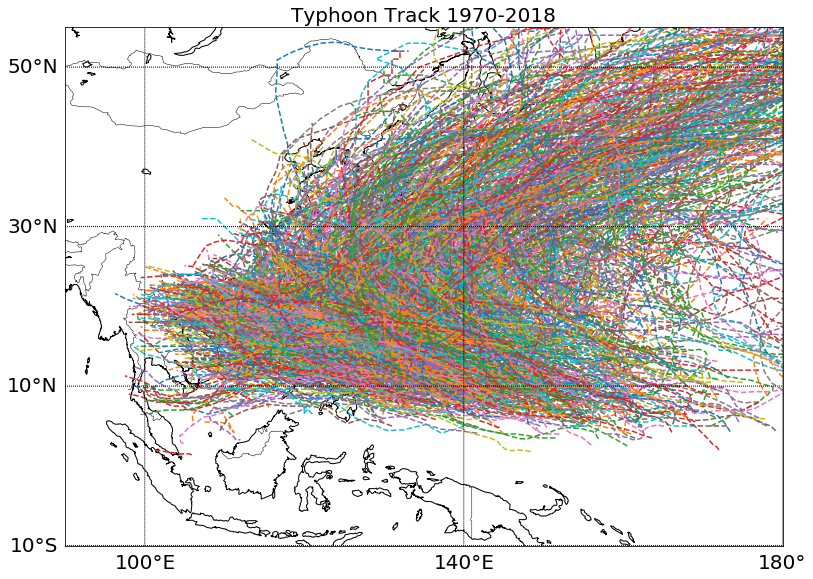

In [67]:
    
m=Basemap(resolution='l',area_thresh=1000,projection='cyl',llcrnrlon=lonmin,urcrnrlon=lonmax,llcrnrlat=latmin,urcrnrlat=latmax)
x, y = m(lon, lat)
# T1 = np.squeeze(Tem[datetime,2,:,:])
# u1= np.squeeze(Uwind[datetime,2,:,:])
# v1 = np.squeeze(Vwind[datetime,2,:,:])
# p1 = np.squeeze(Pre[datetime,2,:,:])
# w1 = np.squeeze(Wwind[datetime,2,:,:])
fig = plt.figure(figsize = (16,9))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
clevls_hgt=[-80,-60,-40,-20,0,20,40,60,80]
parallels = np.arange(-90.,90,30.)
meridians = np.arange(0.,360.,60.)
  #  CS2 = m.contourf(x,y,w1,20)
    #CS2 = m.contour(x,y,w1,15,linewidths = 0.5)
    #CS2.clabel(fontsize = 20,colors= 'k',fmt='%.2f')
m.drawcoastlines(linewidth=0.1)
   # fig = plt.quiver(x,y,u1,v1,angles="uv",minshaft = 2,scale = 400,width = 0.0015,headwidth = 4)
for i in range(len(Typhoon)):
    X= []
    Y = []
    for j in Typhoon[i]:
        X.append(j[2])
        Y.append(j[1])
    fig = plt.plot(X,Y,'--')

#DateTime = num2date(Time[datetime],units = Time.units)
plt.title('Typhoon Track 1970-2018',size=20)
plt.xlim(lonmin,lonmax)
plt.ylim(latmin,latmax)
     # Add Grid Lines
    # 绘制经纬线
m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=20)
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=20)
#m.scatter(X,Y,c = 'r')
# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

In [105]:
# 将数据整理好后存入1970_2018TyphooTrack.csv
import csv
with open('F://Jupyter/Data/1970_2018TyphoonTrack.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Date1']+['Date2']+['Lat']+['Lon']+['ID'])
    for i in Typhoon:
        for j in i:
            unit = 'hours since 1800-01-01 00:00:0.0'
            a = num2date(j[0],units = unit)
            a = a.strftime("%Y%m%d%H")
            spamwriter.writerow([a]+[j[0]]+[j[1]]+[j[2]]+[j[3]])